## Final Project Submission

Please fill out:
* Student name: firdosa mohamed
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Maryann mwikali
* Blog post URL:N/A


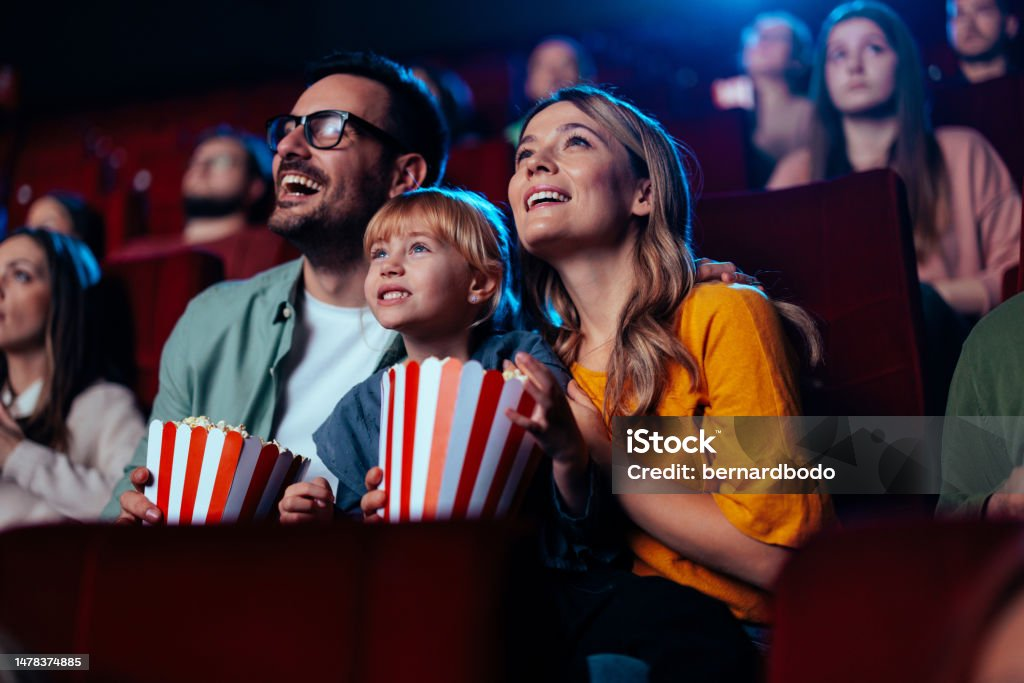

## OVERVIEW

Find out what kinds of movies are doing well at the box office right now by doing in-depth research on current trends and performance.Analyze crowd demographics and box office statistics.Analyze popular movies according to their genre.Examine the tastes and actions of the audience to find out what draws them to the theater, paying particular attention to elements such as genre, narrative style, casting, and representation. Examine the tactics employed by prosperous film studios and production businesses to comprehend their methods for creating, promoting, and distributing films.Provide Microsoft's film studio with practical insights derived from research findings by suggesting which kinds of films to prioritize based on audience preferences, market demand, and industry trends.Create strategic proposals for the movie studio owned by Microsoft. 

## BUSINESS UNDERSTANDING

Microsoft sees an opportunity to grow its presence in the entertainment business by launching its own movie studio. However, due to its lack of experience in film production, Microsoft confronts the issue of selecting the best viable path for its venture. To solve this, extensive market research and analysis are required to determine the types of films that are currently resonating with audiences and performing well at the box office. By learning about current trends, audience preferences, and the competitive landscape, Microsoft can make informed decisions about which films to produce. This insight will allow the head of Microsoft's new movie studio to strategize effectively, capitalizing on identified opportunities while reducing risks, so positioning the studio for success in a highly competitive and dynamic sector.

## loading libraries for analysis and visualization

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

## DATA UNDERSTANDING

In [173]:
bom_movie_df = pd.read_csv("C:\\Users\\Adan\\Documents\\GitHub\\dsc-phase-1-project--film-industry-analysis\\zippedData\\bom.movie_gross.csv.gz")
bom_movie_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [174]:
bom_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [175]:
bom_movie_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

In [176]:
bom_movie_df.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [177]:
bom_movie_df['foreign_gross'].replace('\W', '', regex=True, inplace= True)

In [178]:
bom_movie_df .foreign_gross = bom_movie_df.foreign_gross.astype(float) 

In [179]:
bom_movie_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [180]:
tn_movies_budget_df =pd.read_csv ("C:\\Users\\Adan\\Documents\\GitHub\\dsc-phase-1-project--film-industry-analysis\\zippedData\\tn.movie_budgets.csv.gz")
tn_movies_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [181]:


#change to float
tn_movies_budget_df['production_budget'] = tn_movies_budget_df['production_budget'].replace('[^.0-9]', '', regex=True).astype('float32')
tn_movies_budget_df['domestic_gross'] = tn_movies_budget_df['domestic_gross'].replace('[^.0-9]', '', regex=True).astype('float32')
tn_movies_budget_df['worldwide_gross'] = tn_movies_budget_df['worldwide_gross'].replace('[^.0-9]', '',regex = True).astype('float64')


In [182]:
tn_movies_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507648.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762352.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09


In [183]:
tn_movies_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float32
 4   domestic_gross     5782 non-null   float32
 5   worldwide_gross    5782 non-null   float64
dtypes: float32(2), float64(1), int64(1), object(2)
memory usage: 226.0+ KB


In [184]:
tn_movies_budget_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [185]:
tn_movies_budget_df['release_date'] = pd.to_datetime(tn_movies_budget_df['release_date'], errors='coerce')
tn_movies_budget_df['year'] = tn_movies_budget_df['release_date'].dt.strftime('%Y')
tn_movies_budget_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,2015
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,2018
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420416.0,9.634204e+08,2007
8,9,2017-11-17,Justice League,300000000.0,229024288.0,6.559452e+08,2017
9,10,2015-11-06,Spectre,300000000.0,200074176.0,8.796209e+08,2015


In [186]:
tn_movies_budget_df.sort_values('worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
5037,38,2019-04-23,Living Dark: The Story of Ted the Caver,1750000.0,0.0,0.000000e+00,2019
3975,76,2015-05-15,Pound of Flesh,7500000.0,0.0,0.000000e+00,2015
4627,28,2011-06-28,2:13,3500000.0,0.0,0.000000e+00,2011
4628,29,2013-01-29,"Batman: The Dark Knight Returns, Part 2",3500000.0,0.0,0.000000e+00,2013
3947,48,2019-06-21,Burn Your Maps,8000000.0,0.0,0.000000e+00,2019
...,...,...,...,...,...,...,...
33,34,2015-06-12,Jurassic World,215000000.0,652270656.0,1.648855e+09,2015
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,2018
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,2015
42,43,1997-12-19,Titanic,200000000.0,659363968.0,2.208208e+09,1997


In [187]:
#drop all all rows without the values in domestic gross and worlwide gross columns
tn_movies_budget_drop= tn_movies_budget_df[(tn_movies_budget_df['domestic_gross'] == 0) & (tn_movies_budget_df['worldwide_gross'] == 0)]

In [188]:
tn_movies_budget_df.drop(tn_movies_budget_drop.index, axis=0, inplace=True)
tn_movies_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,2017


In [189]:
#convert year values to string
tn_movies_budget_df['year'] = tn_movies_budget_df['year'].astype(int)

In [190]:
#drop rows which are not between the years 2015 and 2022
tn_movies_budget_df.drop(tn_movies_budget_df[tn_movies_budget_df['year'] <= 2014].index, inplace=True)

tn_movies_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 2 to 5748
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 797 non-null    int64         
 1   release_date       797 non-null    datetime64[ns]
 2   movie              797 non-null    object        
 3   production_budget  797 non-null    float32       
 4   domestic_gross     797 non-null    float32       
 5   worldwide_gross    797 non-null    float64       
 6   year               797 non-null    int32         
dtypes: datetime64[ns](1), float32(2), float64(1), int32(1), int64(1), object(1)
memory usage: 40.5+ KB


In [191]:
tn_movies_budget_df['year'].value_counts()

2015    242
2016    204
2017    162
2018    140
2019     49
Name: year, dtype: int64

In [192]:
#obtain the descriptive statistics
tn_movies_budget_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,year
count,797.000000,797.0,797.0,7.970000e+02,797.000000
mean,50.634881,44454288.0,57354036.0,1.477667e+08,2016.435383
std,29.339221,57002492.0,98196584.0,2.607258e+08,1.255101
min,1.000000,25000.0,0.0,2.600000e+01,2015.000000
25%,25.000000,8000000.0,3000342.0,8.200000e+06,2015.000000
50%,50.000000,22000000.0,24431472.0,4.517374e+07,2016.000000
75%,78.000000,55000000.0,63859436.0,1.594876e+08,2017.000000
max,100.000000,350000000.0,936662208.0,2.053311e+09,2019.000000


In [193]:
#creating a new column that shows gains or losses after a movie production
tn_movies_budget_df['returns'] = (tn_movies_budget_df['worldwide_gross'] - tn_movies_budget_df['production_budget'])
tn_movies_budget_df['returns'] = tn_movies_budget_df['returns'].astype(int) 

In [194]:
tn_movies_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,returns
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,2019,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,2015,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,2017,999721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,2015,1747311220
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,2018,1748134200
